In [29]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting 

In [32]:
# Setting the plotting style to be colorblind-friendly
plt.style.use('seaborn-colorblind') 

C:\Users\dvnha\AppData\Local\Temp\ipykernel_25472\1906296916.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [33]:
stock_prices_df = pd.read_csv("faang_stocks.csv", index_col="Date")

In [ ]:
#format datetime
stock_prices_df.index = pd.to_datetime(stock_prices_df.index)
stock_prices_df

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2020-01-02,75.09,94.90,68.43,209.78,329.81
2020-01-03,74.36,93.75,68.08,208.67,325.90
2020-01-06,74.95,95.14,69.89,212.60,335.83
2020-01-07,74.60,95.34,69.76,213.06,330.75
2020-01-08,75.80,94.60,70.25,215.22,339.26
...,...,...,...,...,...
2023-12-22,193.60,153.42,141.49,353.39,486.76
2023-12-26,193.05,153.41,141.52,354.83,491.19
2023-12-27,193.15,153.34,140.37,357.83,491.79


In [ ]:
#calculate return using pct change and remove NA
returns_df = stock_prices_df.pct_change().dropna()

In [85]:
#equally weights 1/5
portfolio_weights = 5 * [0.2]

In [109]:
portfolio_returns = returns_df.dot(portfolio_weights)
portfolio_returns.head()


Date
2020-01-03   -0.008820
2020-01-06    0.019730
2020-01-07   -0.003478
2020-01-08    0.010243
2020-01-09    0.008046
dtype: float64

In [112]:
portfolio_volatility = np.sqrt(np.dot(portfolio_weights, np.dot(cov_mat, portfolio_weights)))
portfolio_volatility

0.32685124775569524

In [54]:
# Calculate the expected portfolio return
benchmark_exp_return = portfolio_returns.mean()
print("benchmark_exp return", benchmark_exp_return)

# Calculate the portfolio's Sharpe ratio
benchmark_sharpe_ratio = (
    portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)
)
print("benchmark sharp ratio", benchmark_sharpe_ratio)

benchmark_exp return 0.0009366970530650013
benchmark sharp ratio 0.7221868020795008


In [57]:
avg_returns = returns_df.mean() * 252
cov_mat = returns_df.cov() * 252

In [58]:
ef = EfficientFrontier(avg_returns, cov_mat)

In [59]:
weights = ef.min_volatility()
mv_portfolio = pd.Series(weights)

In [113]:
# Find the minimized volatility which is 0.317 less than 0.326 historically
mv_portfolio_vol = ef.portfolio_performance(risk_free_rate=0)[1]
mv_portfolio_vol

0.3175206228163091

In [61]:
ef = EfficientFrontier(avg_returns, cov_mat)

In [62]:
weights = ef.max_sharpe(risk_free_rate=0)
ms_portfolio = pd.Series(weights)

In [63]:
ms_portfolio_sharpe = ef.portfolio_performance(risk_free_rate=0)[2]

In [66]:
ms_portfolio

AAPL     0.787440
AMZN     0.000000
GOOGL    0.199698
META     0.000000
NFLX     0.012861
dtype: float64

In [ ]:
ms_portfolio_sharpe # 0.88 is higher than 0.72 as historical

0.8821809421501466

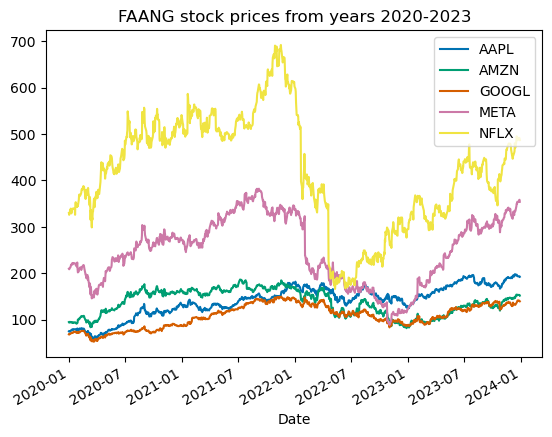

In [68]:
stock_prices_df.plot(title="FAANG stock prices from years 2020-2023");

c:\Users\dvnha\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


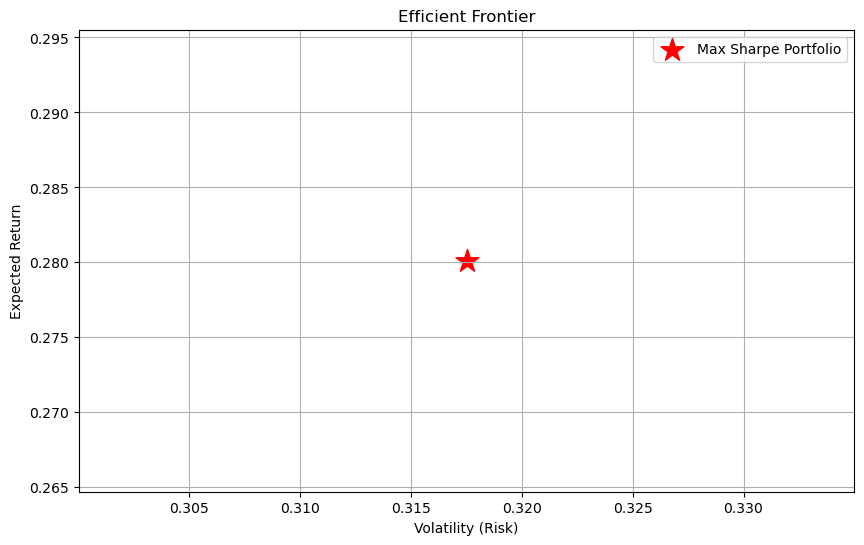

In [102]:

plt.figure(figsize=(10, 6))
plt.scatter(ef.portfolio_performance()[1], ef.portfolio_performance()[0], color='red', marker='*', s=300, label="Max Sharpe Portfolio")
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

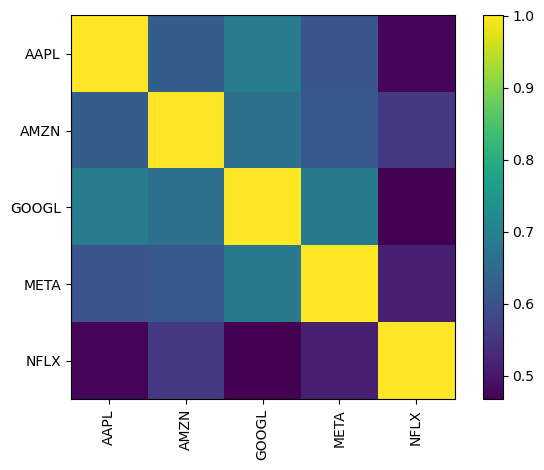

In [83]:
plotting.plot_covariance(cov_mat, plot_correlation = True)